# Loan Prediction

In this project, we will use the LoanTrainingSet dataset to predict who we should give credit to and who we should not. this project is a classification project.

<img src=https://palankarta.com/wp-content/uploads/2021/01/types-of-credit-facility-img.jpg >

Data Dictionary

The dataset consists of the following fields:
* Loan ID: A unique Identifier for the loan information.
* Customer ID: A unique identifier for the customer. Customers may have more than one loan.
* Loan Status: A categorical variable indicating if the loan was paid back or defaulted.
* Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.
* Term: A categorical variable indicating if it is a short term or long term loan.
* Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.
* Years in current job: A categorical variable indicating how many years the customer has been in their current job.
* Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage
* Annual Income: The customer's annual income
* Purpose: A description of the purpose of the loan.
* Monthly Debt: The customer's monthly payment for their existing loans
* Years of Credit History: The years since the first entry in the customer’s credit history
* Months since last delinquent: Months since the last loan delinquent payment
* Number of Open Accounts: The total number of open credit cards
* Number of Credit Problems: The number of credit problems in the customer records.
* Current Credit Balance: The current total debt for the customer
* Maximum Open Credit: The maximum credit limit for all credit sources.
* Bankruptcies: The number of bankruptcies
* Tax Liens: The number of tax liens.


### Import Dataset

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('LoansTrainingSet.csv')

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [5]:
df.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
55732,3772ab1e-d998-47e2-9314-87310e118b29,bc0e36aa-0b5f-493e-b9b0-ff3d5c8c0342,Fully Paid,19756,Short Term,729.0,10+ years,Rent,81064.0,Debt Consolidation,"$1,182.18",20.6,NaN,6,0,30625,33288,0.0,0.0
29119,1d2431e5-4f42-4d12-b466-fb876f400a0c,19cd8de5-b9e5-413c-a959-a8c1f1ae9211,Fully Paid,99999999,Short Term,723.0,NaN,Rent,9329.0,Debt Consolidation,$235.56,22.3,27.0,6,0,2233,5305,0.0,0.0
55740,3775ffe2-75a0-4458-bba7-9e082bc21c41,630fe7b8-8361-4237-9482-3bf6edecb7c3,Fully Paid,11704,Short Term,746.0,9 years,Own Home,48765.0,Debt Consolidation,$213.76,17.3,40.0,17,0,6776,25475,0.0,0.0
202633,c9909597-f7d2-45e7-8231-052468022b5a,b485e18b-fd8c-43de-a77e-828435cd9f89,Fully Paid,99999999,Short Term,748.0,7 years,Rent,37264.0,Buy a Car,$472.01,15.4,NaN,5,0,2858,7346,0.0,0.0
232643,e77dc458-d871-43cb-b44c-d5ddfc5f7533,37517cd5-1cda-459e-bc3a-552590323c15,Fully Paid,99999999,Short Term,750.0,10+ years,Home Mortgage,59358.0,Other,$734.06,21.5,NaN,8,0,1425,52762,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [7]:
df.shape

(256984, 19)

In [8]:
df.nunique()

Loan ID                         215700
Customer ID                     215700
Loan Status                          2
Current Loan Amount              27347
Term                                 2
Credit Score                       334
Years in current job                11
Home Ownership                       4
Annual Income                    60558
Purpose                             10
Monthly Debt                    129115
Years of Credit History            541
Months since last delinquent       131
Number of Open Accounts             59
Number of Credit Problems           12
Current Credit Balance           45704
Maximum Open Credit              87188
Bankruptcies                         8
Tax Liens                           12
dtype: int64

In [9]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

### Feature Engineering

In [10]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

What percentage of the data is empty?

In [11]:
empty_data=df.isnull().sum()
sum_data=len(df)
pct=(empty_data/sum_data)*100
empty=pd.DataFrame({'empty_data':empty_data,'pct':pct})

In [12]:
empty.sort_values(by='pct',ascending=False)

,empty_data,pct
Months since last delinquent,140383,54.627136
Credit Score,61676,23.999938
Annual Income,61676,23.999938
Years in current job,11476,4.465648
Bankruptcies,529,0.205849
Tax Liens,23,0.008950
Years of Credit History,0,0.000000
Maximum Open Credit,0,0.000000
Current Credit Balance,0,0.000000
Number of Credit Problems,0,0.000000


First, we will convert Loan Status to numeric value

In [13]:
Loan_Status={'Fully Paid':1,'Charged Off':0}

In [14]:
df['Loan Status']=df['Loan Status'].map(Loan_Status)

In [15]:
df.sample(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
60683,3c5eb66f-b824-45f0-b5bf-3127f80f0837,99fd452e-ada0-4469-bfea-d85a6e9d58a4,0,6940,Short Term,NaN,< 1 year,Rent,NaN,other,"$1,284.85",10.8,11.0,12,0,114,3167,0.0,0.0
147093,92392a00-dcfc-4014-8cc6-e9f0df57d444,12153d83-f195-4e83-acb0-1e6726738e25,1,1516,Short Term,751.0,7 years,Home Mortgage,64636.0,Debt Consolidation,$287.63,38.3,1.0,8,0,6259,49672,0.0,0.0
251977,fb01576c-85f3-4a7b-bd62-292c6722c3dc,10f56e6c-d4cf-4406-a5f7-3c407f0a1166,1,99999999,Short Term,736.0,10+ years,Home Mortgage,139496.0,Debt Consolidation,"$1,464.71",18.8,41.0,12,0,23439,32465,0.0,0.0
43422,2b353e16-fc0d-456e-b706-9c6bce597f44,c0e6c415-4c8f-4d29-b640-c78b69a53ade,1,9866,Long Term,718.0,5 years,Own Home,115775.0,Debt Consolidation,$305.84,15.0,13.0,6,0,12022,16072,0.0,0.0
217189,d82b285b-d616-4fa9-a98c-3d0991756148,3b8757ed-181f-489a-9c2c-eed38d773296,0,7906,Long Term,642.0,4 years,Rent,71921.0,other,$444.71,10.9,NaN,8,0,9778,9788,0.0,0.0
103918,6753c5a9-6f00-4e70-9959-53806a130b79,3e889f4b-036a-4c9b-bdf1-67e9266b0848,1,99999999,Long Term,674.0,10+ years,Home Mortgage,121169.0,Debt Consolidation,"$1,767.04",17.3,NaN,17,0,24939,41913,0.0,0.0
223754,de9f2d6c-0fd5-4324-859f-46e2efb2030f,e275270f-25a2-403b-a985-b74646d2d35e,1,3004,Short Term,698.0,5 years,Rent,72101.0,Debt Consolidation,$859.20,14.3,NaN,6,0,3057,6704,0.0,0.0
91142,5aa46b7e-a03f-4cb6-a437-cb70f6d5df2d,99233984-285b-4cc4-ad9a-32f6c3118963,0,13861,Short Term,7120.0,10+ years,Rent,56436.0,Debt Consolidation,"$1,255.69",10.4,54.0,11,0,5921,8023,0.0,0.0
43895,2bad2ab7-0d93-4e45-841c-36626df35ecd,b0aeb871-4268-4f78-bc60-43b6cff964e5,1,9820,Short Term,747.0,6 years,Home Mortgage,57282.0,Debt Consolidation,$367.09,14.2,NaN,9,1,3715,14626,1.0,0.0
198538,c57e49ef-c557-4a1b-a63f-095be8ab90e7,3b8801ba-72e6-423a-ac9e-c1c108607911,1,14564,Short Term,NaN,8 years,Home Mortgage,NaN,Debt Consolidation,"$1,297.96",10.1,NaN,9,0,13513,19223,0.0,0.0


We can drop Loan ID and Customer ID columns because we will not need them for algorithm

In [16]:
df.drop(['Loan ID','Customer ID'],axis=1,inplace=True)

In [17]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,1,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,1,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,1,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,1,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


Let's fill the empty values. First we will start "Months since last delinquent" column

In [18]:
df['Months since last delinquent'].describe()

count    116601.000000
mean         34.881450
std          21.854165
min           0.000000
25%          16.000000
50%          32.000000
75%          51.000000
max         176.000000
Name: Months since last delinquent, dtype: float64

We will assume that if this columns is empty the customer never delay credit debt and fill with zero(0)

In [19]:
df['Months since last delinquent'].fillna(0, inplace=True) 

In [20]:
df.isnull().sum().sort_values(ascending=False)

Credit Score                    61676
Annual Income                   61676
Years in current job            11476
Bankruptcies                      529
Tax Liens                          23
Months since last delinquent        0
Maximum Open Credit                 0
Current Credit Balance              0
Number of Credit Problems           0
Number of Open Accounts             0
Loan Status                         0
Years of Credit History             0
Current Loan Amount                 0
Purpose                             0
Home Ownership                      0
Term                                0
Monthly Debt                        0
dtype: int64

We have miceforest library that is very usefull for the numeric values. It fills the empty rows with the most appropriate values.

First we should turn into numeric 'Years in current job' columns.

In [21]:
df['Years in current job'].value_counts()

Years in current job
10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: count, dtype: int64

In [22]:
df['Years in current job'] = df['Years in current job'].str.replace('years', '').str.replace('year', '').str.replace('<', '').str.replace('+', '').str.strip()
df['Years in current job']=df['Years in current job'].astype(float)

In [23]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,other,"$1,106.04",26.3,0.0,17,0,6262,19149,0.0,0.0
2,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,0.0,5,0,20967,28335,0.0,0.0
3,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,$751.92,26.2,0.0,9,0,22529,43915,0.0,0.0
4,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,$355.18,11.5,0.0,12,0,17391,37081,0.0,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  int64  
 1   Current Loan Amount           256984 non-null  int64  
 2   Term                          256984 non-null  object 
 3   Credit Score                  195308 non-null  float64
 4   Years in current job          245508 non-null  float64
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 195308 non-null  float64
 7   Purpose                       256984 non-null  object 
 8   Monthly Debt                  256984 non-null  object 
 9   Years of Credit History       256984 non-null  float64
 10  Months since last delinquent  256984 non-null  float64
 11  Number of Open Accounts       256984 non-null  int64  
 12  Number of Credit Problems     256984 non-nul

Let's import miceforest library

In [25]:
import miceforest as mf

In [26]:
imp=mf.ImputationKernel(df[['Credit Score','Annual Income','Years in current job','Bankruptcies','Tax Liens']])

In [27]:
complete_df = imp.complete_data()

In [28]:
df[['Credit Score','Annual Income','Years in current job','Bankruptcies','Tax Liens']] = complete_df[['Credit Score','Annual Income','Years in current job','Bankruptcies','Tax Liens']]

In [29]:
df.isnull().sum().sort_values(ascending=False)

Loan Status                     0
Years of Credit History         0
Bankruptcies                    0
Maximum Open Credit             0
Current Credit Balance          0
Number of Credit Problems       0
Number of Open Accounts         0
Months since last delinquent    0
Monthly Debt                    0
Current Loan Amount             0
Purpose                         0
Annual Income                   0
Home Ownership                  0
Years in current job            0
Credit Score                    0
Term                            0
Tax Liens                       0
dtype: int64

We filled all the empty values. Let's continue analizing the other columns.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  int64  
 1   Current Loan Amount           256984 non-null  int64  
 2   Term                          256984 non-null  object 
 3   Credit Score                  256984 non-null  float64
 4   Years in current job          256984 non-null  float64
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 256984 non-null  float64
 7   Purpose                       256984 non-null  object 
 8   Monthly Debt                  256984 non-null  object 
 9   Years of Credit History       256984 non-null  float64
 10  Months since last delinquent  256984 non-null  float64
 11  Number of Open Accounts       256984 non-null  int64  
 12  Number of Credit Problems     256984 non-nul

In [31]:
df['Term'].value_counts() 

Term
Short Term    192632
Long Term      64352
Name: count, dtype: int64

We will not do anything about 'Term' before label encoder.

In [32]:
df['Home Ownership'].value_counts() 

Home Ownership
Home Mortgage    124477
Rent             109010
Own Home          22923
HaveMortgage        574
Name: count, dtype: int64

'Home Mortgage' and 'HaveMortgage' are same situation. So, we will replace them with Mortgage.

In [33]:
df['Home Ownership']=df['Home Ownership'].str.replace('HaveMortgage','Mortgage').str.replace('Home Mortgage','Mortgage')

In [34]:
df['Home Ownership'].value_counts() 

Home Ownership
Mortgage    125051
Rent        109010
Own Home     22923
Name: count, dtype: int64

In [35]:
df['Purpose'].value_counts()                 

Purpose
Debt Consolidation      203911
Home Improvements        14915
other                    14268
Other                     9667
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: count, dtype: int64

'Other' and 'other' are same situation. So, we will replace them with Other.

In [36]:
df['Purpose']=df['Purpose'].str.replace('other','Other')

In [37]:
df['Purpose'].value_counts()   

Purpose
Debt Consolidation      203911
Other                    23935
Home Improvements        14915
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: count, dtype: int64

In [38]:
df['Monthly Debt'].value_counts()

Monthly Debt
$0.00         254
$636.87        12
$679.66        12
$847.85        12
$838.10        12
             ... 
$899.24         1
$339.53         1
$1,152.39       1
$2,711.19       1
$2,525.82       1
Name: count, Length: 129115, dtype: int64

'Monthly Debt' is should be numerical value, so we will drop $ symbol and turn the data into numeric.

In [39]:
df['Monthly Debt']=df['Monthly Debt'].str.replace('$','').str.replace(',','').str.strip().astype(float)

In [40]:
df['Monthly Debt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Monthly Debt
Non-Null Count   Dtype  
--------------   -----  
256984 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


In [41]:
df['Maximum Open Credit'].value_counts()

Maximum Open Credit
0        1597
0         234
10180      19
15662      19
14770      19
         ... 
17558       1
42753       1
29185       1
36222       1
62371       1
Name: count, Length: 87188, dtype: int64

In [42]:
value_err=df[df['Maximum Open Credit']=='#VALUE!']

In [43]:
value_err.shape

(4, 17)

There is a value error in 4 rows. We should replace them.

In [44]:
df['Maximum Open Credit']=df['Maximum Open Credit'].replace('#VALUE!',np.nan)

In [45]:
df['Maximum Open Credit']=df['Maximum Open Credit'].astype(float)

In [46]:
df['Maximum Open Credit'].mean(),df['Maximum Open Credit'].median(),df['Maximum Open Credit'].max(),df['Maximum Open Credit'].min()

(35723.50259942408, 21740.0, 176332155.0, 0.0)

In [47]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mean())

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  int64  
 1   Current Loan Amount           256984 non-null  int64  
 2   Term                          256984 non-null  object 
 3   Credit Score                  256984 non-null  float64
 4   Years in current job          256984 non-null  float64
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 256984 non-null  float64
 7   Purpose                       256984 non-null  object 
 8   Monthly Debt                  256984 non-null  float64
 9   Years of Credit History       256984 non-null  float64
 10  Months since last delinquent  256984 non-null  float64
 11  Number of Open Accounts       256984 non-null  int64  
 12  Number of Credit Problems     256984 non-nul

Now, we will apply label encoder to convert data that is string to numeric.

In [49]:
df=pd.get_dummies(df,drop_first=True)

In [50]:
df.head()

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,1,11520,741.0,10.0,33694.0,584.03,12.3,41.0,10,0,...,False,False,False,False,True,False,False,False,False,False
1,1,3441,734.0,4.0,42269.0,1106.04,26.3,0.0,17,0,...,False,False,False,False,False,False,False,False,True,False
2,1,21029,747.0,10.0,90126.0,1321.85,28.8,0.0,5,0,...,False,False,False,False,True,False,False,False,False,False
3,1,18743,747.0,10.0,38072.0,751.92,26.2,0.0,9,0,...,True,False,False,False,True,False,False,False,False,False
4,1,11731,746.0,4.0,50025.0,355.18,11.5,0.0,12,0,...,False,True,False,False,True,False,False,False,False,False


In [51]:
df.corr(numeric_only=True)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
Loan Status,1.000000,0.269804,-0.335025,0.003715,0.056231,-0.016609,0.035548,-0.000343,-0.020787,-0.010179,...,-0.008300,-0.062959,0.003706,0.024949,-0.001793,0.000505,0.022265,-0.005133,-0.004531,-0.000259
Current Loan Amount,0.269804,1.000000,-0.118554,0.005166,0.021616,-0.001928,0.014725,-0.003187,-0.003094,-0.000062,...,-0.005950,-0.019448,0.001675,0.007060,-0.000173,0.002249,0.005638,-0.002055,-0.000516,-0.001048
Credit Score,-0.335025,-0.118554,1.000000,0.000991,-0.027003,0.005823,-0.008191,0.000238,0.006055,0.000306,...,0.001049,0.020079,-0.001295,-0.008290,0.004946,-0.001959,-0.007049,0.002116,-0.003624,-0.001936
Years in current job,0.003715,0.005166,0.000991,1.000000,0.054962,0.119348,0.207605,0.036067,0.045888,0.038787,...,0.011571,-0.196578,-0.012271,-0.026235,0.033986,-0.020892,0.029223,-0.003765,-0.043069,0.003349
Annual Income,0.056231,0.021616,-0.027003,0.054962,1.000000,0.362424,0.118024,0.015069,0.111508,-0.010305,...,-0.028643,-0.122160,0.006275,-0.010469,-0.025983,-0.008327,0.058300,-0.001341,-0.014503,-0.009908
Monthly Debt,-0.016609,-0.001928,0.005823,0.119348,0.362424,1.000000,0.188646,0.013114,0.410416,-0.052792,...,-0.034933,-0.187406,-0.020118,-0.052909,0.098217,-0.024400,-0.003684,-0.012430,-0.084390,-0.016935
Years of Credit History,0.035548,0.014725,-0.008191,0.207605,0.118024,0.188646,1.000000,0.086489,0.128033,0.061251,...,0.032031,-0.197944,-0.009164,-0.007641,0.009894,0.003037,0.034114,0.002957,-0.033250,-0.011536
Months since last delinquent,-0.000343,-0.003187,0.000238,0.036067,0.015069,0.013114,0.086489,1.000000,0.035319,0.071807,...,0.002152,-0.019788,-0.002597,-0.007771,0.001573,-0.006790,0.016106,0.000101,-0.005713,-0.003966
Number of Open Accounts,-0.020787,-0.003094,0.006055,0.045888,0.111508,0.410416,0.128033,0.035319,1.000000,-0.013731,...,-0.009351,-0.131451,-0.015354,-0.039338,0.107607,-0.014989,-0.018276,-0.017824,-0.085712,-0.018508
Number of Credit Problems,-0.010179,-0.000062,0.000306,0.038787,-0.010305,-0.052792,0.061251,0.071807,-0.013731,1.000000,...,0.006744,-0.003146,-0.000180,-0.007838,-0.003844,-0.007293,0.023186,0.000867,-0.009268,-0.000315


<Axes: >

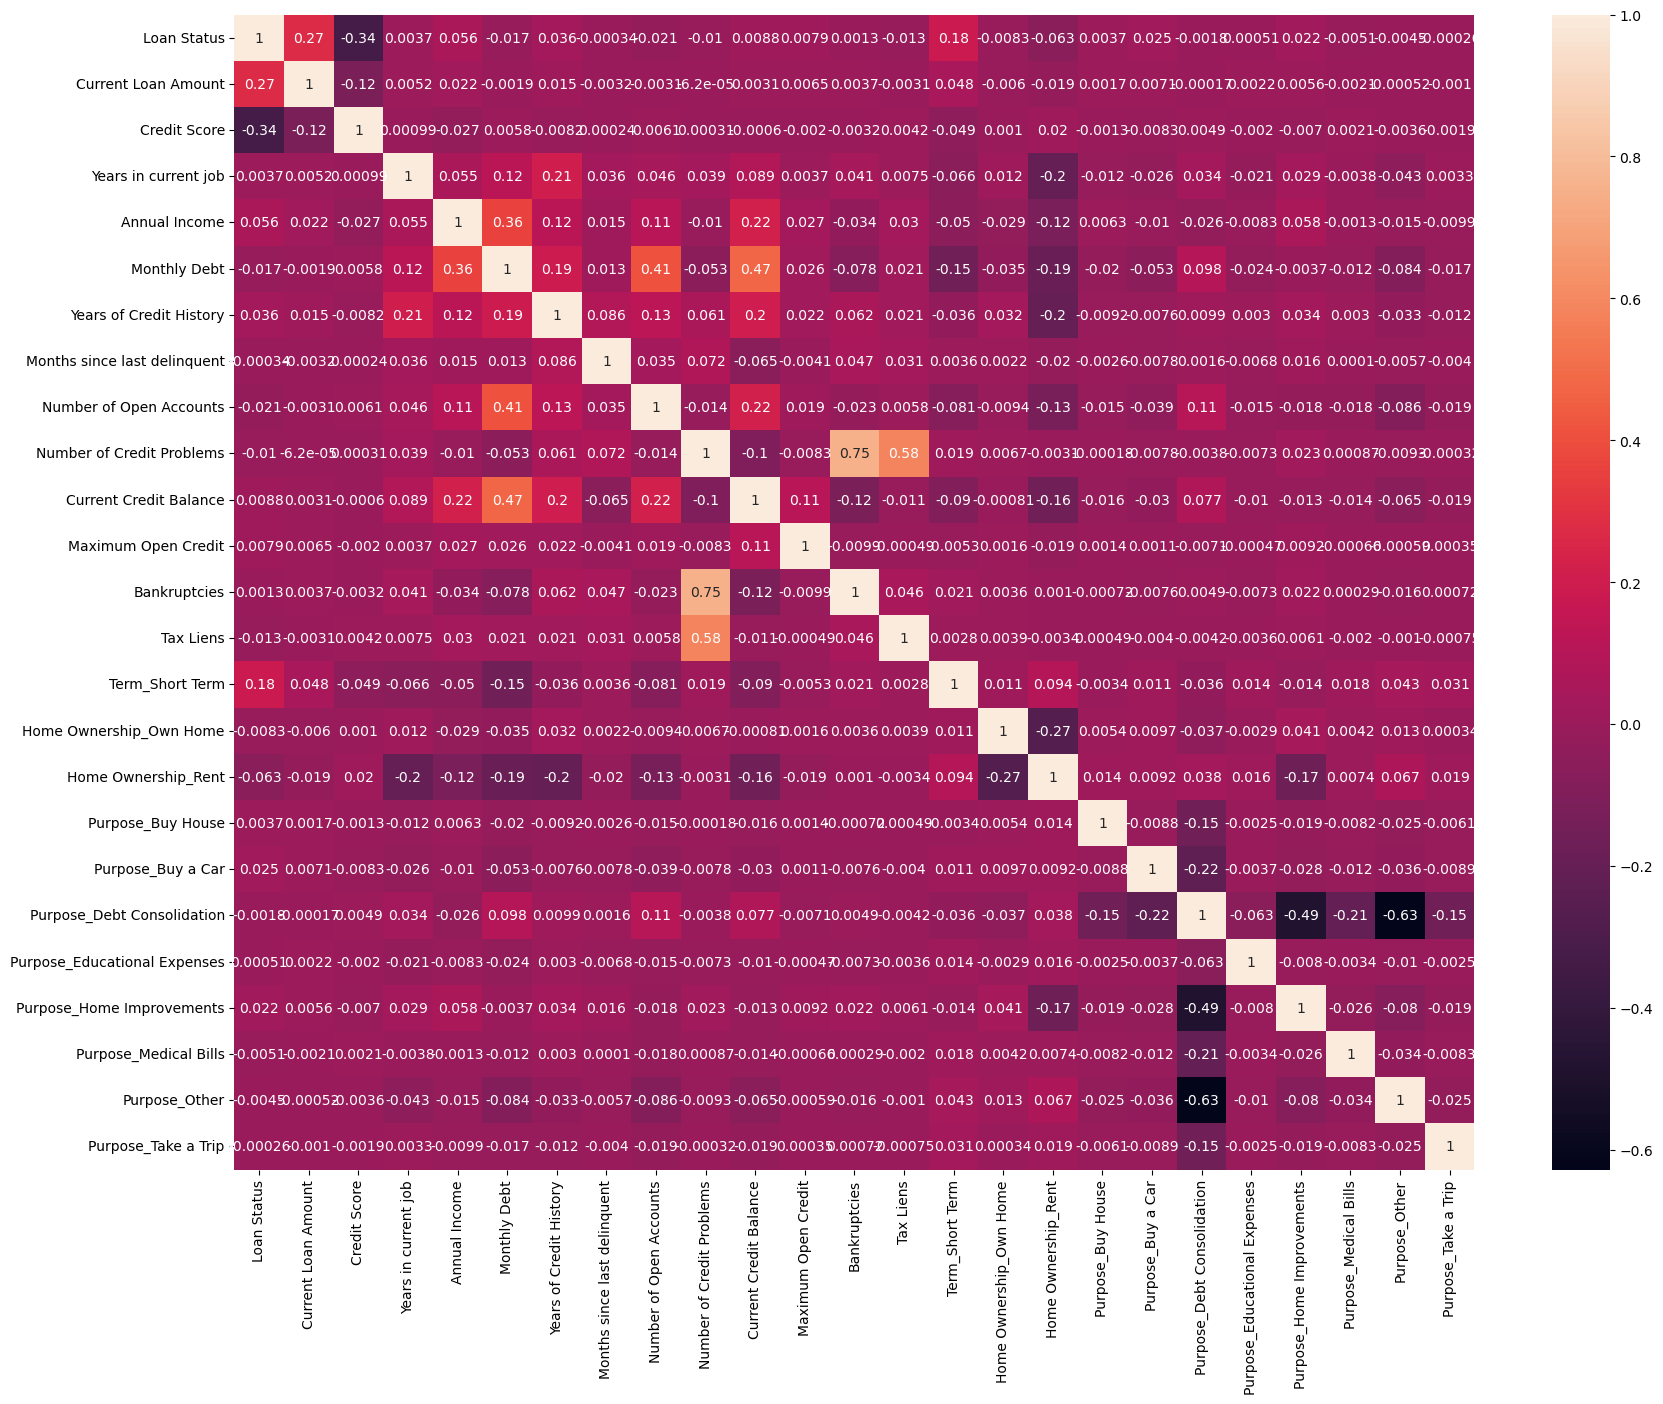

In [52]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),annot=True)

### ML Classification

We will import ML libraries.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [54]:
x=df.drop('Loan Status',axis=1)
y=df[['Loan Status']]

In [55]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42) #We split data %80 for train and %20 for test

In [56]:
g=GaussianNB()
b=BernoulliNB()
l=LogisticRegression()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
h=GradientBoostingClassifier()
k=KNeighborsClassifier()

We will use these libraries in order and see which one gives better results.

* GaussianNB

In [57]:
g.fit(x_train,y_train)

GaussianNB()

In [58]:
gtahmin=g.predict(x_test)

In [59]:
accuracy_score(gtahmin,y_test)

0.449676051131389

In [60]:
confusion_matrix(gtahmin,y_test)

array([[16143, 28267],
       [   18,  6969]], dtype=int64)

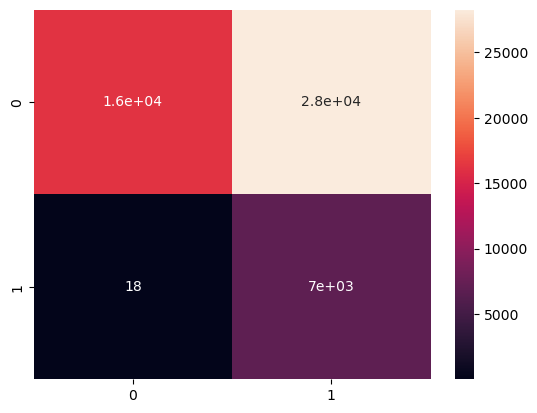

In [61]:
sns.heatmap(confusion_matrix(gtahmin,y_test), annot=True);

In [62]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

           0       1.00      0.36      0.53     44410
           1       0.20      1.00      0.33      6987

    accuracy                           0.45     51397
   macro avg       0.60      0.68      0.43     51397
weighted avg       0.89      0.45      0.51     51397



Accuracy: %45

* BernoulliNB

In [63]:
b.fit(x_train,y_train)

BernoulliNB()

In [64]:
btahmin=b.predict(x_test)

In [65]:
accuracy_score(btahmin,y_test)

0.6882113742047201

In [66]:
confusion_matrix(btahmin,y_test)

array([[ 1282,  1146],
       [14879, 34090]], dtype=int64)

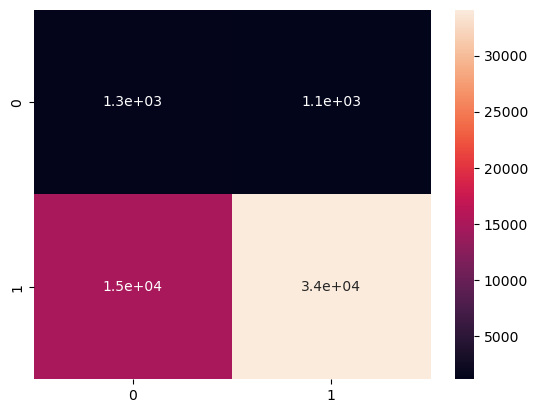

In [67]:
sns.heatmap(confusion_matrix(btahmin,y_test), annot=True);

In [68]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

           0       0.08      0.53      0.14      2428
           1       0.97      0.70      0.81     48969

    accuracy                           0.69     51397
   macro avg       0.52      0.61      0.47     51397
weighted avg       0.93      0.69      0.78     51397



Accuracy: %69

* LogisticRegression

In [69]:
l.fit(x_train, y_train)

LogisticRegression()

In [70]:
ltahmin=l.predict(x_test)

In [71]:
accuracy_score(ltahmin,y_test)

0.7417748117594413

In [72]:
confusion_matrix(ltahmin,y_test)

array([[ 3600,   711],
       [12561, 34525]], dtype=int64)

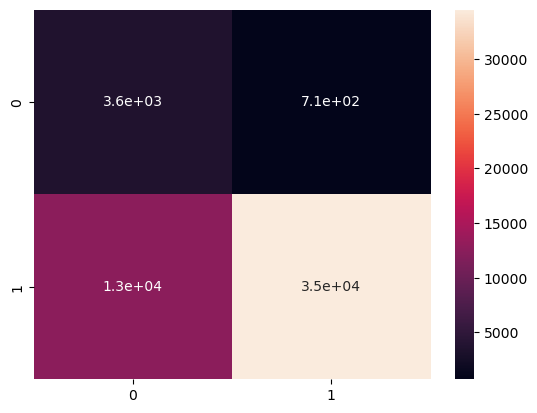

In [73]:
sns.heatmap(confusion_matrix(ltahmin,y_test), annot=True);

In [74]:
print(classification_report(ltahmin,y_test))

              precision    recall  f1-score   support

           0       0.22      0.84      0.35      4311
           1       0.98      0.73      0.84     47086

    accuracy                           0.74     51397
   macro avg       0.60      0.78      0.60     51397
weighted avg       0.92      0.74      0.80     51397



Accuracy: %74

* DecisionTreeClassifier

In [75]:
d.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
dtahmin=d.predict(x_test)

In [77]:
accuracy_score(dtahmin,y_test)

0.7339533435803646

In [78]:
confusion_matrix(dtahmin,y_test)

array([[10307,  7820],
       [ 5854, 27416]], dtype=int64)

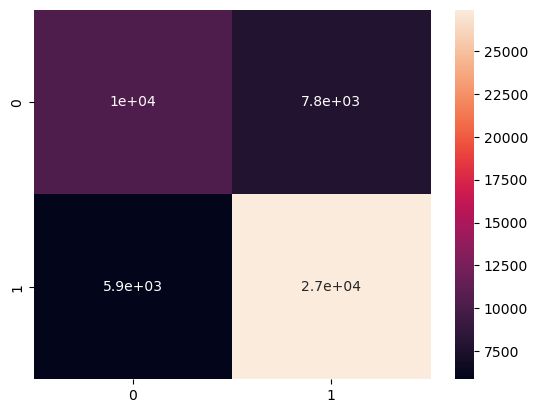

In [79]:
sns.heatmap(confusion_matrix(dtahmin,y_test), annot=True);

In [80]:
print(classification_report(dtahmin,y_test))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60     18127
           1       0.78      0.82      0.80     33270

    accuracy                           0.73     51397
   macro avg       0.71      0.70      0.70     51397
weighted avg       0.73      0.73      0.73     51397



Accuracy: %74

* RandomForestClassifier

In [81]:
r.fit(x_train, y_train)

RandomForestClassifier()

In [82]:
rtahmin=r.predict(x_test)

In [83]:
accuracy_score(rtahmin,y_test)

0.8299122516878417

In [84]:
confusion_matrix(rtahmin,y_test)

array([[ 9419,  2000],
       [ 6742, 33236]], dtype=int64)

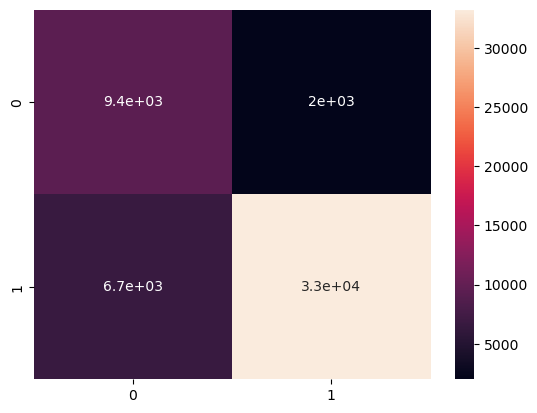

In [85]:
sns.heatmap(confusion_matrix(rtahmin,y_test), annot=True);

In [86]:
print(classification_report(rtahmin,y_test))

              precision    recall  f1-score   support

           0       0.58      0.82      0.68     11419
           1       0.94      0.83      0.88     39978

    accuracy                           0.83     51397
   macro avg       0.76      0.83      0.78     51397
weighted avg       0.86      0.83      0.84     51397



Accuracy: %83

*  GradientBoostingClassifier

In [87]:
h.fit(x_train, y_train)

GradientBoostingClassifier()

In [88]:
htahmin=h.predict(x_test)

In [89]:
accuracy_score(htahmin,y_test)

0.7532929937544993

In [90]:
confusion_matrix(htahmin,y_test)

array([[ 5737,  2256],
       [10424, 32980]], dtype=int64)

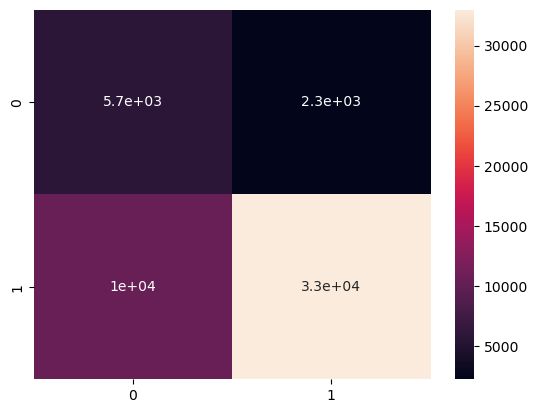

In [91]:
sns.heatmap(confusion_matrix(htahmin,y_test), annot=True);

In [92]:
print(classification_report(htahmin,y_test))

              precision    recall  f1-score   support

           0       0.35      0.72      0.48      7993
           1       0.94      0.76      0.84     43404

    accuracy                           0.75     51397
   macro avg       0.65      0.74      0.66     51397
weighted avg       0.85      0.75      0.78     51397



Accuracy: %75

* KNeighborsClassifier

In [93]:
k.fit(x_train, y_train)

KNeighborsClassifier()

In [94]:
ktahmin=k.predict(x_test)

In [95]:
accuracy_score(ktahmin,y_test)

0.712162188454579

In [96]:
confusion_matrix(ktahmin,y_test)

array([[ 7120,  5753],
       [ 9041, 29483]], dtype=int64)

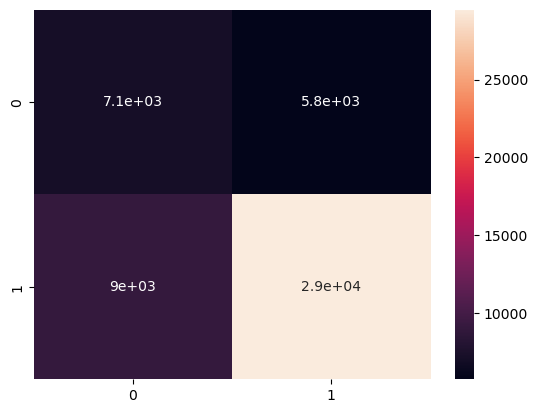

In [97]:
sns.heatmap(confusion_matrix(ktahmin,y_test), annot=True);

In [98]:
print(classification_report(ktahmin,y_test))

              precision    recall  f1-score   support

           0       0.44      0.55      0.49     12873
           1       0.84      0.77      0.80     38524

    accuracy                           0.71     51397
   macro avg       0.64      0.66      0.64     51397
weighted avg       0.74      0.71      0.72     51397



Accuracy: %71

### Results

We can say that the best result we have is given us by RandomForestClassifier. So we can use this model to make a decision which custome we should give a credit or not.

Finally let's show the feature importance. Which column is more influential in our decision?

In [100]:
r.feature_importances_

array([0.15023211, 0.18387758, 0.03918514, 0.09445701, 0.08857171,
       0.08303883, 0.04467893, 0.05721481, 0.00797391, 0.08824336,
       0.09158882, 0.00591544, 0.00256319, 0.02795243, 0.00545549,
       0.00734071, 0.00102319, 0.00138007, 0.0074408 , 0.00030522,
       0.00350969, 0.0016978 , 0.00528474, 0.00106902])

In [104]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':r.feature_importances_})

In [105]:
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

In [106]:
feature_importance

,Feature,Coefs
1,Credit Score,0.183878
0,Current Loan Amount,0.150232
3,Annual Income,0.094457
10,Maximum Open Credit,0.091589
4,Monthly Debt,0.088572
9,Current Credit Balance,0.088243
5,Years of Credit History,0.083039
7,Number of Open Accounts,0.057215
6,Months since last delinquent,0.044679
2,Years in current job,0.039185


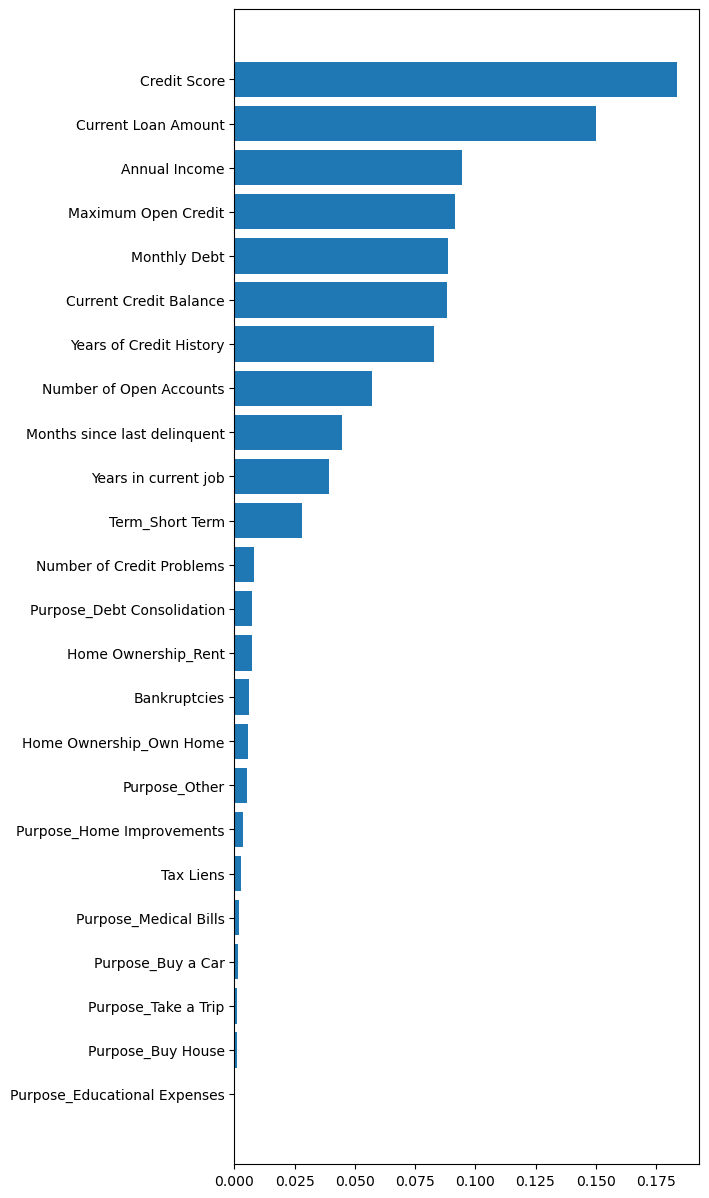

In [107]:
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'],feature_importance['Coefs']);
plt.gca().invert_yaxis()

### Conclusion

Using a dataset of bank customers, we have developed a classification model that predicts which customers will pay if they are given a loan and which customers will not. With the help of the model, the loan decision can be made quickly by taking the information of new customers. 

While preparing the model, we read the data with the pandas library. Then we filled the empty data by doing EDA and feature engineering respectively. For this, we used the miceforest library. Then we divided the data into 80% train and 20% test. We trained models separately with GaussianNB, BernoulliNB, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, KNeighborsClassifier ML libraries respectively. RandomForestClassifier made the best prediction with 83% accuracy score. We also found the most important factors in our decision making. Credit score, Current Loan Amount, Annual Income were the 3 most important features. 